Number of training examples:  455
Number of testing examples:  114


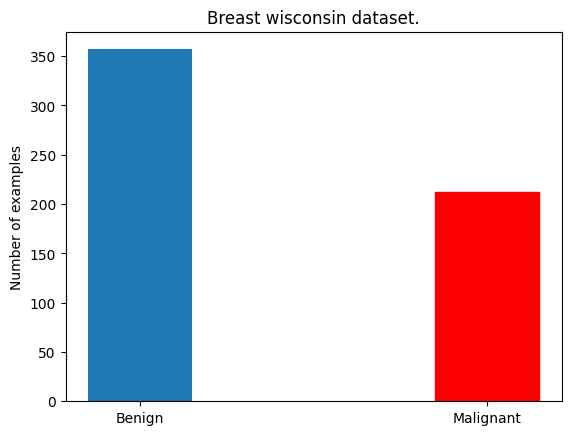

In [33]:
# In this exercise, we are going to classify the breast cancer wisconsin dataset.
# This dataset contains in total 569 examples, among them 212 examples are labelled as malignant (M or 0) and 357
# examples are marked as benign (B or 1). .Each example is a vector of 30 dimensions.
# We will train a binary logistic regression model using this dataset.

# Load, normalize, split and visualize your dataset. This step has been done for you.
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

# load the dataset
data = load_breast_cancer()
x = data.data
y = data.target

# split into training and test sets, namely 80 percent of examples goes for the training,
# 20 percent goes for the test set
N_train = int(0.8 * x.shape[0])
x_train = x[:N_train,:]
y_train = y[:N_train]
x_test = x[N_train:,:]
y_test = y[N_train:]
#add one column in y_train and
#y_train = y_train.reshape(-1,1)
#y_test = y_test.reshape(-1,1)

# scale features by removing mean and dividing by the standard deviation
# use only the statistics from the training set
x_train_mean = np.mean(x_train, axis=0)
x_train_std = np.std(x_train, axis=0)
x_test_mean = np.mean(x_test, axis=0)
x_test_std = np.std(x_test, axis=0)
# scale features by removing mean and dividing by the standard deviation
x_train_scaled = (x_train-x_train_mean)/x_train_std# YOUR CODE GOES HERE
x_test_scaled = (x_test-x_test_mean)/x_test_std# YOUR CODE GOES HERE

print("Number of training examples: ",x_train_scaled.shape[0])
print("Number of testing examples: ",x_test_scaled.shape[0])

# visualize the dataset using histogram
labels = ['Benign','Malignant']
population = [np.sum(y),np.sum(y==0)]
y_pos = np.arange(len(labels))
barlist = plt.bar(y_pos, population, align='center',width=0.3)
plt.xticks(y_pos, labels)
plt.ylabel('Number of examples')
plt.title('Breast wisconsin dataset.')
barlist[1].set_color('r')
plt.show()

In [34]:
# Add intercept terms and initialize parameters
x_train_scaled = np.concatenate((np.ones((x_train_scaled.shape[0], 1)), x_train_scaled), axis=1)
x_test_scaled = np.concatenate((np.ones((x_test_scaled.shape[0], 1)), x_test_scaled), axis=1)

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(455, 31)
(114, 31)
(455,)
(114,)


In [35]:
# Step 1: Implement the sigmoid, gradient and cost functions

# this function returns the probability of y=1
# x: data matrix
# theta: model's parameters\

def sigmoid(x,theta):
    u=np.dot(x,theta)
    return 1/(1+np.exp(-u))
    ### YOUR CODE GOES HERE ###

# logarithmic loss
# x: data matrix (2D)
# y: label (1D)
# theta: model's parameters (1D)
def compute_cost(x,y,theta):
    return -(1/len(x)) * np.sum(np.multiply(y,np.log(sigmoid(x,theta)))+np.multiply((1-y),np.log(1-sigmoid(x,theta))))
    ### YOUR CODE GOES HERE ###

def compute_gradient(x,y,theta):
    return (1/(len(x)))*np.dot((sigmoid(x,theta)-y),x) #dot is same as square sum, if it was same value
    ### YOUR CODE GOES HERE ###

def approximate_gradient(x,y,theta,epsilon):
    n_features = x.shape[1]
    app_grad = np.zeros(n_features)
    for i in range(n_features):
        epsilon_one_hot = np.zeros(n_features)
        epsilon_one_hot[i] = epsilon
        theta_before = theta - epsilon_one_hot
        theta_after = theta + epsilon_one_hot
        app_grad[i] = (compute_cost(x,y,theta_after) - compute_cost(x,y,theta_before))/(2*epsilon)
    return app_grad

theta = 0.5 * np.random.randn(x_train_scaled.shape[1])
grad = compute_gradient(x_train_scaled,y_train,theta)
epsilon = 1e-4
app_grad = approximate_gradient(x_train_scaled,y_train,theta,epsilon)
print('Sum of gradient squared error: ',np.sum((grad - app_grad)**2))
print(grad)
print(app_grad)

Sum of gradient squared error:  5.27084058479608e-19
[-0.07074985  0.11414839  0.09335814  0.11818055  0.11747809  0.0735
  0.11438059  0.13735247  0.14463116  0.09647365  0.04776     0.16978939
  0.08344101  0.16874639  0.14790131  0.08178194  0.10506546  0.09034627
  0.14893134  0.05218214  0.09031785  0.1236041   0.08402416  0.12627138
  0.1201853   0.07194291  0.0955082   0.11264371  0.13461831  0.05641053
  0.08491307]
[-0.07074985  0.11414839  0.09335814  0.11818055  0.11747809  0.0735
  0.11438059  0.13735247  0.14463116  0.09647365  0.04776     0.16978939
  0.08344101  0.16874639  0.14790131  0.08178194  0.10506546  0.09034627
  0.14893134  0.05218214  0.09031785  0.1236041   0.08402416  0.12627138
  0.1201853   0.07194291  0.0955082   0.11264371  0.13461831  0.05641053
  0.08491307]


In [31]:
# Step 2: Update model parameters using mini-batch gradient descent algorithm

# try different values for the learning rate
learning_rate = 0.01

# number of training iterations
num_samples = x_train_scaled.shape[0]
batch_size = int(num_samples/10)
N_iterations = int(num_samples / batch_size) * 50  # 50 epochs

# prepare to plot
plt.subplot(111)

# keep the cost value for each training step
J = np.zeros(N_iterations)

# initialize new parameters using random distribution
theta_msgd = ### YOUR CODE GOES HERE ###

start = 0
end = 0
for step in range(N_iterations):
    if step % (num_samples / batch_size) == 0:
        # shuffle the training data
        ### YOUR CODE GOES HERE ###

        # indices = np.random.permutation(num_samples)
        # x_train_scaled = x_train_scaled[indices,:]
        # y_train = y_train[indices]

    # create a mini-batch of data to train on
    x_batch = ### YOUR CODE GOES HERE ###
    y_batch = ### YOUR CODE GOES HERE ###

    # calculate the cost on x_step and y_step
    J[step] = ### YOUR CODE GOES HERE ###

    # update theta_msgd using a x_step and y_step
    theta_msgd = ### YOUR CODE GOES HERE ###

# calculate the loss on the whole training set
J_train = compute_cost(x_train_scaled, y_train, theta_msgd)
print('training cost: %f' %J_train)
# plot cost function
plt.plot(J)
plt.xlabel('Training step')
plt.ylabel('Cost')
plt.show()

SyntaxError: invalid syntax (<ipython-input-31-e0baee9b4c78>, line 18)

In [ ]:
# Step 3: Predict and draw the confusion matrix
# calculate the accuracy
from sklearn.metrics import confusion_matrix
import itertools

# this function draw the confusion matrix, you don't need to touch it.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# this function computes the accuracy, which is the percentage of the correctly classified examples
# y_ground_truth: original labels (1D vector)
# y_pre: predicted labels (1D vector)
# return: accuracy in percent
def compute_accuracy(y_ground_truth,y_pred):
    ### YOUR CODE GOES  HERE ###

# In logistic regression, we choose a threshold.
# If the output of our hypothesis is greater than this threshold, the example is classified as 1,
# otherwise it is given 0.

threshold = ### YOUR CODE GOES HERE ###
y_pred = ### YOUR CODE GOES HERE ###
print("Accuracy on test set: {:.2f}".format(compute_accuracy(y_test,y_pred)))

# calculate the cost for the test set
test_cost = compute_cost(x_test_scaled,y_test,theta_msgd)
print('Test cost: ',test_cost)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=labels,
                      title='Confusion matrix, without normalization')
plt.show()